In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mno
!pip install sweetviz
import sweetviz as sv

from sklearn.model_selection import train_test_split

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.9 MB/s 
Mounted at /content/drive


In [2]:
vehicle = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Data/vehicle_data.parquet')
accident = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Data/accident_data.parquet')

In [3]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

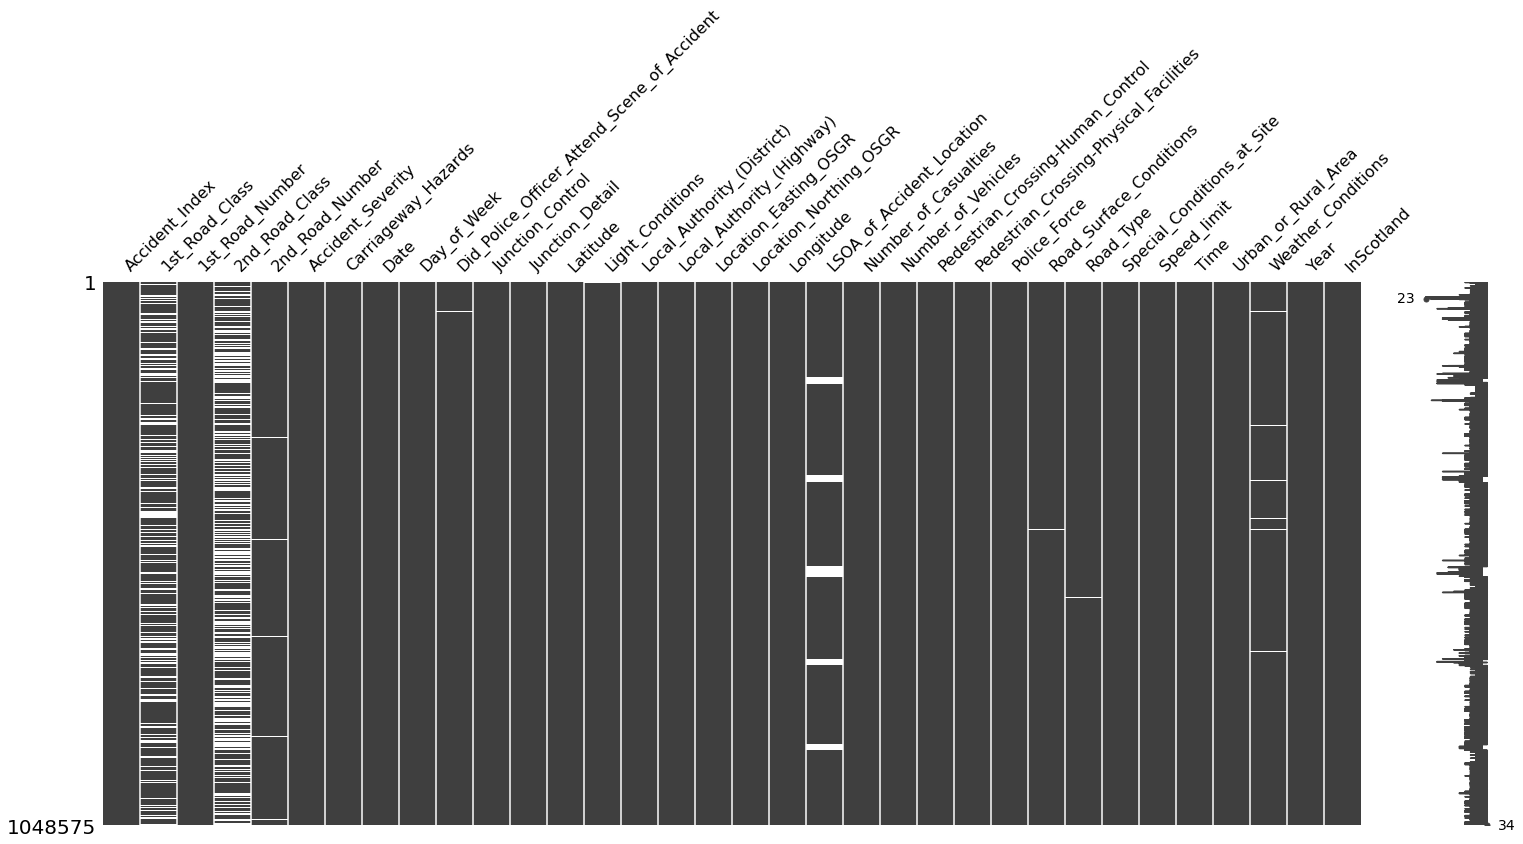

In [5]:
mno.matrix(accident)

In [6]:
accident.dropna(subset=['Carriageway_Hazards', 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Road_Type', 'Special_Conditions_at_Site', 'Latitude', 'Longitude', 'Light_Conditions', 'Pedestrian_Crossing-Human_Control', 'Time', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Physical_Facilities'], inplace=True)
accident['Weather_Conditions'].replace(np.NaN, 'Unknown', inplace=True)
accident['1st_Road_Class'].replace(np.NaN, 'Unknown', inplace=True)
accident['1st_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
accident['2nd_Road_Class'].replace(np.NaN, 'Unknown', inplace=True)
accident['2nd_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
accident['LSOA_of_Accident_Location'].replace(np.NaN, 'Unknown', inplace=True)

In [7]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037512 entries, 1 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1037512 non-null  object 
 1   1st_Road_Class                               1037512 non-null  object 
 2   1st_Road_Number                              1037512 non-null  object 
 3   2nd_Road_Class                               1037512 non-null  object 
 4   2nd_Road_Number                              1037512 non-null  object 
 5   Accident_Severity                            1037512 non-null  object 
 6   Carriageway_Hazards                          1037512 non-null  object 
 7   Date                                         1037512 non-null  object 
 8   Day_of_Week                                  1037512 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

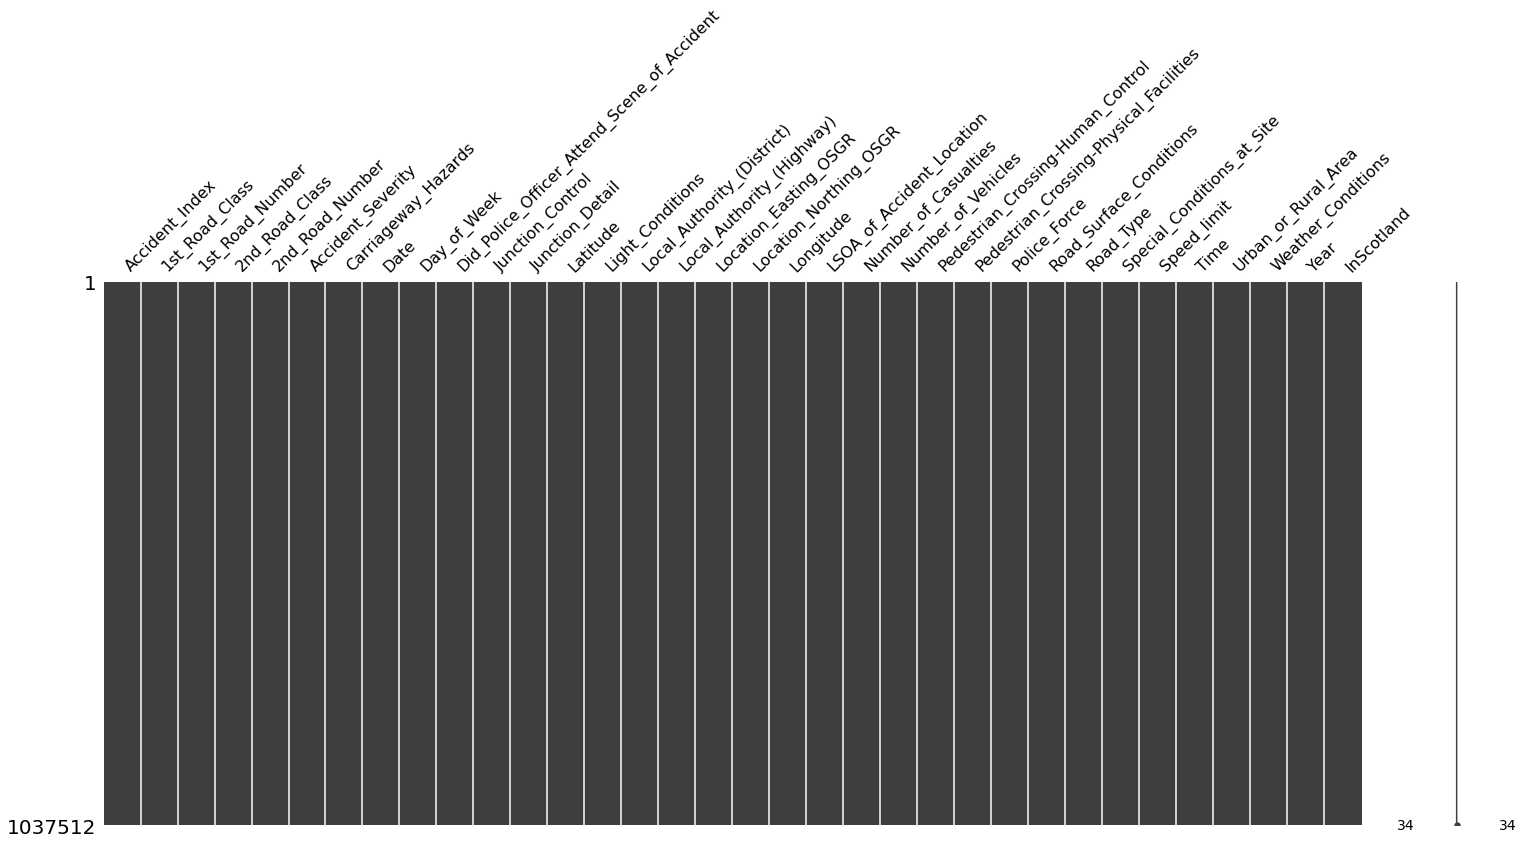

In [8]:
mno.matrix(accident)

In [9]:
for column in accident.columns:
    print(column + ' : ' + str(len(accident[column].unique())))
    if(len(accident[column].unique()) < 100):
        print(column + ' : ' + str(accident[column].unique()))
    print('\n')

Accident_Index : 663339


1st_Road_Class : 6
1st_Road_Class : ['B' 'C' 'Unknown' 'A' 'Motorway' 'A(M)']


1st_Road_Number : 6540


2nd_Road_Class : 7
2nd_Road_Class : ['C' 'Unknown' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']


2nd_Road_Number : 6934


Accident_Severity : 3
Accident_Severity : ['Slight' 'Serious' 'Fatal']


Carriageway_Hazards : 6
Carriageway_Hazards : ['None' 'Other object on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' 'Vehicle load on road'
 'Pedestrian in carriageway - not injured']


Date : 2191


Day_of_Week : 7
Day_of_Week : ['Wednesday' 'Thursday' 'Monday' 'Saturday' 'Sunday' 'Tuesday' 'Friday']


Did_Police_Officer_Attend_Scene_of_Accident : 3
Did_Police_Officer_Attend_Scene_of_Accident : [1. 2. 3.]


Junction_Control : 7
Junction_Control : ['Auto traffic signal' 'Data missing or out of range'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Auto traffic sigl' 'Not at junction or within 20 metres']


Junction_Detail :

In [10]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

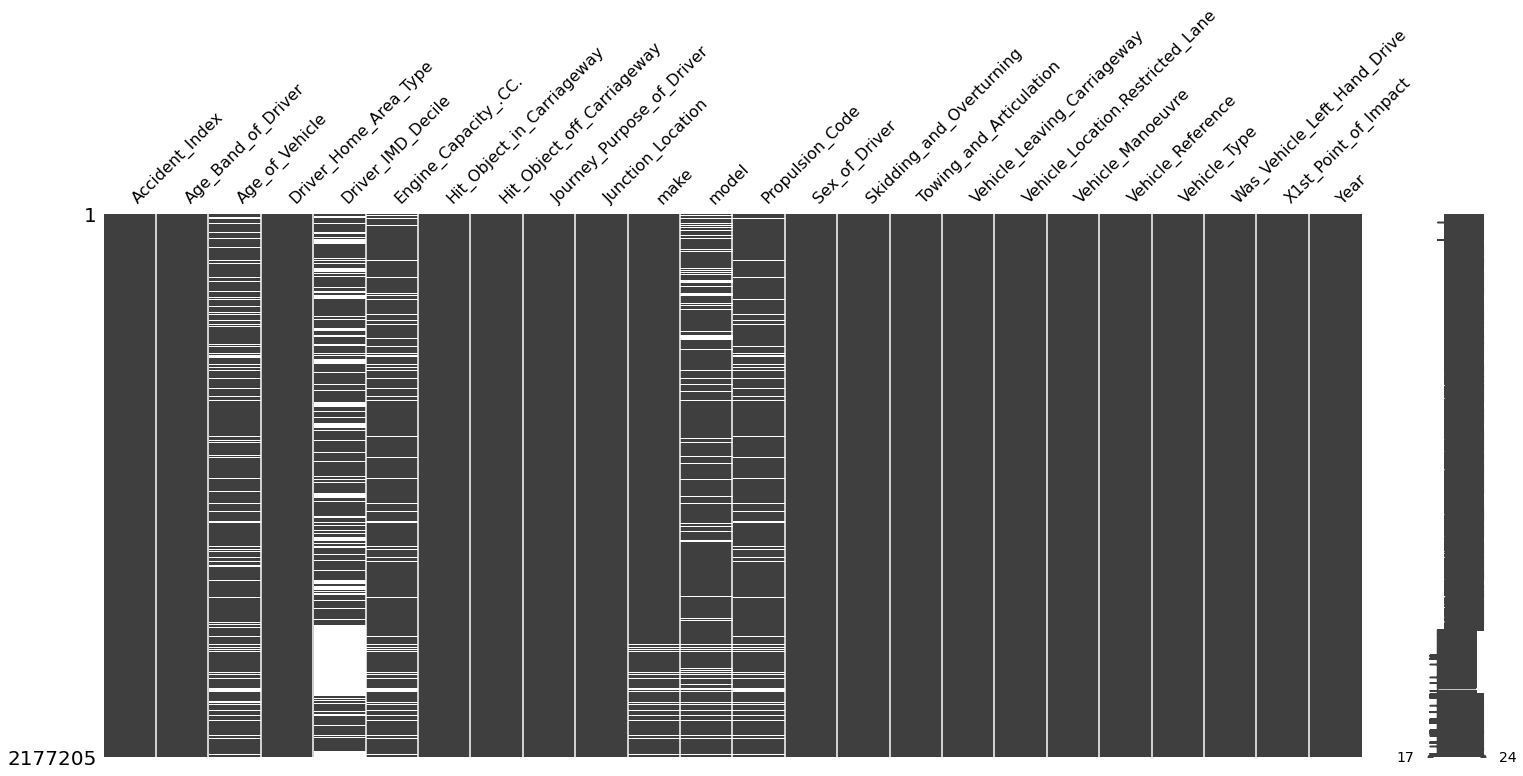

In [11]:
mno.matrix(vehicle)

In [12]:
vehicle.dropna(subset=['Vehicle_Location.Restricted_Lane'], inplace=True) 
vehicle['make'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['model'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['Propulsion_Code'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['Driver_IMD_Decile'].replace(np.NaN, 0, inplace=True)
vehicle['Age_of_Vehicle'].replace(np.NaN, -1, inplace=True)
vehicle['Engine_Capacity_.CC.'].replace(np.NaN, -1, inplace=True)
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175888 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

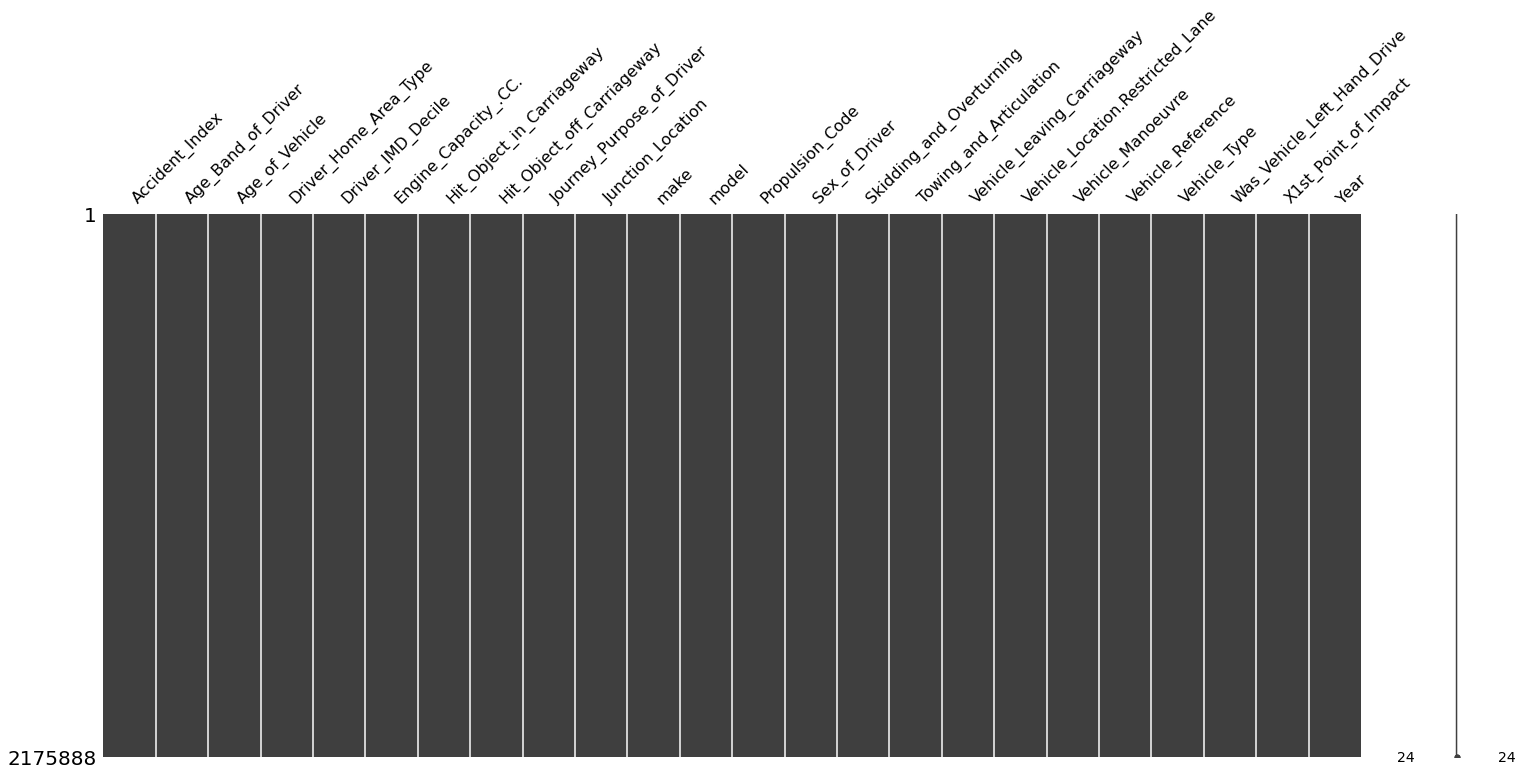

In [13]:
mno.matrix(vehicle)

In [14]:
for column in vehicle.columns:
    print(column + ' : ' + str(len(vehicle[column].unique())))
    if(len(vehicle[column].unique()) < 100):
        print(column + ' : ' + str(vehicle[column].unique()))
    print('\n')

Accident_Index : 1488220


Age_Band_of_Driver : 12
Age_Band_of_Driver : ['26 - 35' '66 - 75' '36 - 45' '46 - 55' '21 - 25'
 'Data missing or out of range' '16 - 20' '56 - 65' 'Over 75' '11 - 15'
 '6 - 10' '0 - 5']


Age_of_Vehicle : 89
Age_of_Vehicle : [  3.  -1.   4.   1.  10.   2.  11.   6.   9.   5.  13.  15.   7.  12.
   8.  16.  14.  28.  41.  17.  37.  21.  27.  23.  20.  24.  18.  25.
  38.  40.  39.  26.  42.  36.  19.  22.  30.  34.  32.  29.  31.  33.
  45.  35.  49.  43.  48.  71.  47.  52.  46.  44.  53.  51.  50.  76.
  85.  58.  78.  64.  80.  61.  68.  59.  54.  63.  55.  57.  65.  60.
  56.  66.  72.  70.  75.  69.  95.  83.  79.  73. 111.  77.  74. 104.
  90. 105.  91.  84.  67.]


Driver_Home_Area_Type : 4
Driver_Home_Area_Type : ['Urban area' 'Data missing or out of range' 'Rural' 'Small town']


Driver_IMD_Decile : 11
Driver_IMD_Decile : [ 4.  3.  0.  8.  6. 10.  7.  5.  2.  1.  9.]


Engine_Capacity_.CC. : 2556


Hit_Object_in_Carriageway : 13
Hit_Object_in_Carriag

In [15]:
accident['1st_Road_Number'] = accident['1st_Road_Number'].astype(str)
accident['2nd_Road_Number'] = accident['2nd_Road_Number'].astype(str)
#report = sv.analyze(accident)
#report.show_html()

In [16]:
#report = sv.analyze(vehicle)
#report.show_html()

In [17]:
rtc = pd.merge(accident, vehicle, how='left', on='Accident_Index')
rtc.info()
rtc.dropna(subset=['Age_Band_of_Driver'], inplace=True)
rtc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161693 entries, 0 to 1161692
Data columns (total 57 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1161693 non-null  object 
 1   1st_Road_Class                               1161693 non-null  object 
 2   1st_Road_Number                              1161693 non-null  object 
 3   2nd_Road_Class                               1161693 non-null  object 
 4   2nd_Road_Number                              1161693 non-null  object 
 5   Accident_Severity                            1161693 non-null  object 
 6   Carriageway_Hazards                          1161693 non-null  object 
 7   Date                                         1161693 non-null  object 
 8   Day_of_Week                                  1161693 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

In [18]:
#report = sv.analyze(rtc)
#report.show_html()

In [19]:
accident['Date'] = pd.to_datetime(accident['Date'], format='%d/%m/%Y')
accident['Month'] = accident['Date'].apply(lambda x:x.month)
accident['Time'] = pd.to_datetime(accident['Time'], format='%H:%M')
accident['Hour'] = accident['Time'].apply(lambda x:x.hour)
accident['Junction_Control'] = accident['Junction_Control'].map({"Auto traffic sigl": "Auto traffic signal"}).fillna(accident["Junction_Control"])
accident['Special_Conditions_at_Site'] = accident['Special_Conditions_at_Site'].map({'Auto traffic sigl - out': 'Auto traffic signal - out', 'Auto sigl part defective':'Auto signal part defective'}).fillna(accident["Special_Conditions_at_Site"])
prepped = accident[['1st_Road_Class', '2nd_Road_Class', 'Accident_Severity', 'Carriageway_Hazards', 'Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Hour', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland']]
prepped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037512 entries, 1 to 1048574
Data columns (total 23 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   1st_Road_Class                           1037512 non-null  object 
 1   2nd_Road_Class                           1037512 non-null  object 
 2   Accident_Severity                        1037512 non-null  object 
 3   Carriageway_Hazards                      1037512 non-null  object 
 4   Month                                    1037512 non-null  int64  
 5   Day_of_Week                              1037512 non-null  object 
 6   Junction_Control                         1037512 non-null  object 
 7   Junction_Detail                          1037512 non-null  object 
 8   Latitude                                 1037512 non-null  float64
 9   Light_Conditions                         1037512 non-null  object 
 10  Longitude         

In [20]:
for column in prepped.columns:
    print(column + ' : ' + str(len(prepped[column].unique())))
    if(len(prepped[column].unique()) < 100):
        print(column + ' : ' + str(prepped[column].unique()))
    print('\n')

1st_Road_Class : 6
1st_Road_Class : ['B' 'C' 'Unknown' 'A' 'Motorway' 'A(M)']


2nd_Road_Class : 7
2nd_Road_Class : ['C' 'Unknown' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']


Accident_Severity : 3
Accident_Severity : ['Slight' 'Serious' 'Fatal']


Carriageway_Hazards : 6
Carriageway_Hazards : ['None' 'Other object on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' 'Vehicle load on road'
 'Pedestrian in carriageway - not injured']


Month : 12
Month : [ 1  2  3  4  5  6  7  8  9 10 11 12]


Day_of_Week : 7
Day_of_Week : ['Wednesday' 'Thursday' 'Monday' 'Saturday' 'Sunday' 'Tuesday' 'Friday']


Junction_Control : 6
Junction_Control : ['Auto traffic signal' 'Data missing or out of range'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Not at junction or within 20 metres']


Junction_Detail : 10
Junction_Detail : ['Crossroads' 'Not at junction or within 20 metres'
 'T or staggered junction' 'Mini-roundabout' 'Other junction'
 'More than 4 arms (no

In [21]:
encode = pd.get_dummies(prepped, columns = ['1st_Road_Class', '2nd_Road_Class', 'Carriageway_Hazards', 'Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Hour', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland'])
encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037512 entries, 1 to 1048574
Columns: 137 entries, Accident_Severity to InScotland_Yes
dtypes: float64(2), int64(2), object(1), uint8(132)
memory usage: 178.1+ MB


In [22]:
encode['Accident_Severity'] = encode['Accident_Severity'].astype('category')
encode['Accident_Severity'] = encode['Accident_Severity'].cat.codes

In [23]:
X = encode.drop('Accident_Severity', axis=1).copy()
y = encode[['Accident_Severity']].copy()

test_size = int(len(X) * .15)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = 22)

In [24]:
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    LGBMClassifier(),
    XGBClassifier(objective='multi:softmax', n_estimators=10, seed = 22)    
    ]

In [ ]:
best_Accuracy = float('inf')
best_model = ''
for model in classifiers:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    if accuracy_score(y_test, y_pred) < best_Accuracy:
        best_Accuracy = accuracy_score(y_test, y_pred)
        best_model = model
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tAccuarcy Score:", accuracy_score(y_test, y_pred))
    print()

print('Best Model: ', best_model)
print('Best Accuracy: ', best_Accuracy)

KNeighborsClassifier()
	Training time: 0.347s
	Prediction time: 4572.747s
	Accuarcy Score: 0.8349825864572757

